## Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import glob
import os

## Loading the Data

The GTSRB dataset contains around 50,000 color images in 43 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
def readTrafficSigns(rootpath):
    images = []
    labels = []
    
    for c in range(43):
        prefix = rootpath + '/' + format(c, '05d') + '/'
        gtFile = open(prefix + 'GT-' + format(c,'05d') + '.csv')
        print(gtFile)
        gtReader = csv.reader(gtFile,delimiter=';')
        print("Headers: ", gtReader.__next__())
        
        for row in gtReader:
            images.append(plt.imread(prefix + row[0]))
            labels.append(row[7])
        
        gtFile.close()
        
    return images,labels

In [4]:
# Download class names
# wget "https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv" -outfile "signnames.csv"
classes = pd.read_csv('signnames.csv')
class_names = {}
for i, row in classes.iterrows():
    class_names[str(row[0])] = row[1]

In [5]:
classes

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [37]:
class_names

{'0': 'Speed limit (20km/h)',
 '1': 'Speed limit (30km/h)',
 '2': 'Speed limit (50km/h)',
 '3': 'Speed limit (60km/h)',
 '4': 'Speed limit (70km/h)',
 '5': 'Speed limit (80km/h)',
 '6': 'End of speed limit (80km/h)',
 '7': 'Speed limit (100km/h)',
 '8': 'Speed limit (120km/h)',
 '9': 'No passing',
 '10': 'No passing for vehicles over 3.5 metric tons',
 '11': 'Right-of-way at the next intersection',
 '12': 'Priority road',
 '13': 'Yield',
 '14': 'Stop',
 '15': 'No vechiles',
 '16': 'Vehicles over 3.5 metric tons prohibited',
 '17': 'No entry',
 '18': 'General caution',
 '19': 'Dangerous curve to the left',
 '20': 'Dangerous curve to the right',
 '21': 'Double curve',
 '22': 'Bumpy road',
 '23': 'Slippery road',
 '24': 'Road narrows on the right',
 '25': 'Road work',
 '26': 'Traffic signals',
 '27': 'Pedestrians',
 '28': 'Children crossing',
 '29': 'Bicycles crossing',
 '30': 'Beware of ice/snow',
 '31': 'Wild animals crossing',
 '32': 'End of all speed and passing limits',
 '33': 'Turn 

In [38]:
train_path=".\GTSRB_Training\Final_Training\Images"
trainImages, trainLabels = readTrafficSigns(train_path)

<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00000/GT-00000.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00001/GT-00001.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00002/GT-00002.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00003/GT-00003.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00004/GT-00004.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', '

In [39]:
len(trainImages)

39209

In [40]:
np.unique(trainLabels)

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '4', '40', '41', '42', '5', '6', '7', '8', '9'], dtype='<U2')

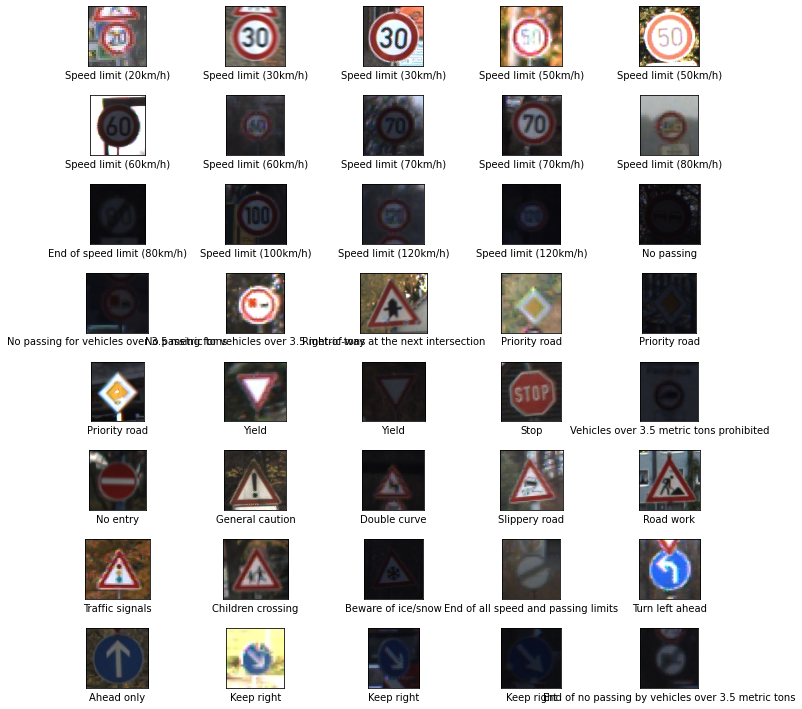

In [41]:
plot = 1
plt.figure(figsize=(10,10))
for i in range(0,39209,1000):
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[trainLabels[i]])
    plot += 1
plt.show()

In [51]:
from collections import Counter

label_counts = Counter(trainLabels).most_common()
for l, c in label_counts:
    print(c, '\t', l ,'\t', class_names[l])

2250 	 2 	 Speed limit (50km/h)
2220 	 1 	 Speed limit (30km/h)
2160 	 13 	 Yield
2100 	 12 	 Priority road
2070 	 38 	 Keep right
2010 	 10 	 No passing for vehicles over 3.5 metric tons
1980 	 4 	 Speed limit (70km/h)
1860 	 5 	 Speed limit (80km/h)
1500 	 25 	 Road work
1470 	 9 	 No passing
1440 	 7 	 Speed limit (100km/h)
1410 	 3 	 Speed limit (60km/h)
1410 	 8 	 Speed limit (120km/h)
1320 	 11 	 Right-of-way at the next intersection
1200 	 18 	 General caution
1200 	 35 	 Ahead only
1110 	 17 	 No entry
780 	 14 	 Stop
780 	 31 	 Wild animals crossing
689 	 33 	 Turn right ahead
630 	 15 	 No vechiles
600 	 26 	 Traffic signals
540 	 28 	 Children crossing
510 	 23 	 Slippery road
450 	 30 	 Beware of ice/snow
420 	 6 	 End of speed limit (80km/h)
420 	 16 	 Vehicles over 3.5 metric tons prohibited
420 	 34 	 Turn left ahead
390 	 22 	 Bumpy road
390 	 36 	 Go straight or right
360 	 20 	 Dangerous curve to the right
360 	 40 	 Roundabout mandatory
330 	 21 	 Double curve
300 	 

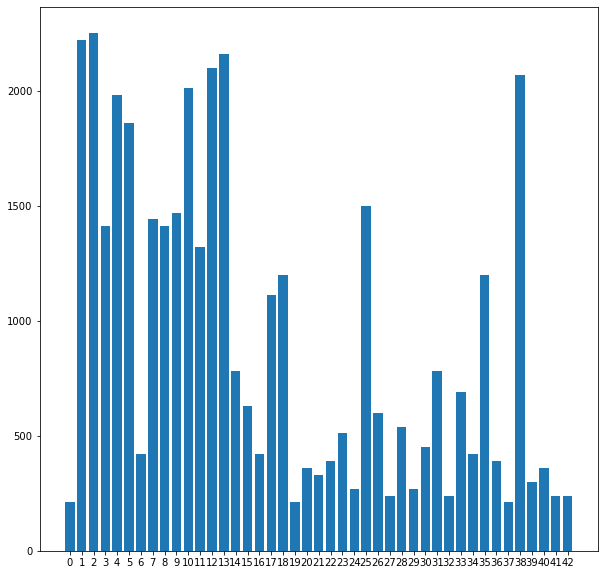

In [52]:
w = Counter(trainLabels)
fig, axs = plt.subplots(figsize=(10,10))
bc = axs.bar(w.keys(), w.values())
axs.set_xticks(axs.get_xticks()[::1])

### Test Dataset

In [63]:
def readTrafficSignsTest(rootpath):
    images = []
    labels = []
    
    gtFile = open(rootpath + '/GT-final_test.csv')
    print(gtFile)
    gtReader = csv.reader(gtFile,delimiter=';')
    print("Headers: ", gtReader.__next__())

    for row in gtReader:
        images.append(plt.imread(rootpath + '/' + row[0]))
        labels.append(row[7])

    gtFile.close()
        
    return images,labels

In [64]:
test_path=".\GTSRB_Test\Final_Test\Images"
testImages, testLabels = readTrafficSignsTest(test_path)

<_io.TextIOWrapper name='.\\GTSRB_Test\\Final_Test\\Images/GT-final_test.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']


## Preprocessing Images

We first import the tensorflow library to use some of it's suite of helper functions to resize and standardize the image data.

In [65]:
import tensorflow as tf
# import cv2

### Size Standardization

We first determine the max and min sizes of the images in our dataset to determine a fixed constant shape to resize them to. We need to do this so that we can provide constant sized inputs to our CNNs.

In [66]:
maxsize = (1,1,3)
for i in [t.shape for t in trainImages]:
    if i[0] > maxsize[0] or i[1] > maxsize[1]:
        print(i)
        maxsize = i
        
print(maxsize)

(30, 29, 3)
(30, 30, 3)
(31, 31, 3)
(32, 30, 3)
(31, 31, 3)
(34, 33, 3)
(35, 34, 3)
(36, 36, 3)
(38, 37, 3)
(39, 40, 3)
(42, 41, 3)
(44, 44, 3)
(44, 46, 3)
(48, 47, 3)
(48, 50, 3)
(51, 53, 3)
(54, 57, 3)
(58, 59, 3)
(61, 63, 3)
(70, 70, 3)
(76, 76, 3)
(86, 85, 3)
(97, 97, 3)
(110, 108, 3)
(127, 124, 3)
(148, 144, 3)
(170, 164, 3)
(171, 171, 3)
(175, 176, 3)
(159, 180, 3)
(168, 191, 3)
(178, 201, 3)
(203, 216, 3)
(201, 224, 3)
(211, 216, 3)
(219, 224, 3)
(213, 226, 3)
(213, 231, 3)
(225, 243, 3)
(225, 243, 3)


In [67]:
minsize = (100,100,3)
for i in [t.shape for t in trainImages]:
    if i[0] < minsize[0] or i[1] < minsize[1]:
        print(i)
        minsize = i
        
print(minsize)

(30, 29, 3)
(29, 30, 3)
(26, 27, 3)
(26, 25, 3)
(25, 26, 3)
(27, 25, 3)
(25, 26, 3)
(25, 25, 3)
(25, 25, 3)


#### Test data run

In [68]:
maxsize = (1,1,3)
for i in [t.shape for t in testImages]:
    if i[0] > maxsize[0] or i[1] > maxsize[1]:
        print(i)
        maxsize = i
        
print(maxsize)

(54, 53, 3)
(57, 60, 3)
(130, 147, 3)
(143, 155, 3)
(163, 168, 3)
(159, 181, 3)
(187, 209, 3)
(202, 230, 3)
(229, 258, 3)
(232, 266, 3)
(232, 266, 3)


In [69]:
minsize = (100,100,3)
for i in [t.shape for t in testImages]:
    if i[0] < minsize[0] or i[1] < minsize[1]:
        print(i)
        minsize = i
        
print(minsize)

(54, 53, 3)
(45, 42, 3)
(29, 27, 3)
(27, 27, 3)
(26, 29, 3)
(28, 26, 3)
(27, 28, 3)
(27, 27, 3)
(26, 26, 3)
(25, 30, 3)
(27, 26, 3)
(26, 29, 3)
(28, 28, 3)
(27, 29, 3)
(28, 27, 3)
(41, 25, 3)
(34, 33, 3)
(32, 30, 3)
(30, 32, 3)
(28, 30, 3)
(27, 27, 3)
(27, 26, 3)
(26, 25, 3)
(25, 26, 3)
(27, 25, 3)
(26, 26, 3)
(25, 27, 3)
(26, 26, 3)
(25, 28, 3)
(27, 27, 3)
(27, 26, 3)
(26, 26, 3)
(25, 26, 3)
(26, 25, 3)
(25, 27, 3)
(27, 26, 3)
(26, 28, 3)
(28, 27, 3)
(26, 25, 3)
(25, 30, 3)
(29, 29, 3)
(29, 26, 3)
(28, 29, 3)
(27, 26, 3)
(26, 28, 3)
(28, 27, 3)
(26, 26, 3)
(25, 26, 3)
(27, 25, 3)
(26, 25, 3)
(25, 29, 3)
(31, 25, 3)
(28, 31, 3)
(27, 26, 3)
(26, 27, 3)
(27, 26, 3)
(26, 30, 3)
(47, 29, 3)
(35, 34, 3)
(28, 27, 3)
(27, 26, 3)
(25, 25, 3)
(25, 25, 3)


### Convert to Tensors

In [70]:
trainTensors = []
for i in range(len(trainImages)):
    try:
        trainTensors.append(tf.convert_to_tensor(trainImages[i]))
    except:
        print(i, trainImages[i].shape)

In [71]:
len(trainTensors), len(trainImages)

(39209, 39209)

#### Test data

In [72]:
testTensors = []
for i in range(len(testImages)):
    try:
        testTensors.append(tf.convert_to_tensor(testImages[i]))
    except:
        print(i, testImages[i].shape)

In [73]:
len(testTensors), len(testImages)

(12630, 12630)

### Resize and Crop/Pad

In [74]:
IMG_SIZE = 75 #40
trainPadTensor = []
for i in range(len(trainTensors)):
    try:
        trainPadTensor.append(tf.image.resize_with_crop_or_pad(trainTensors[i], IMG_SIZE, IMG_SIZE))
    except:
        print(i, trainTensors[i].shape)

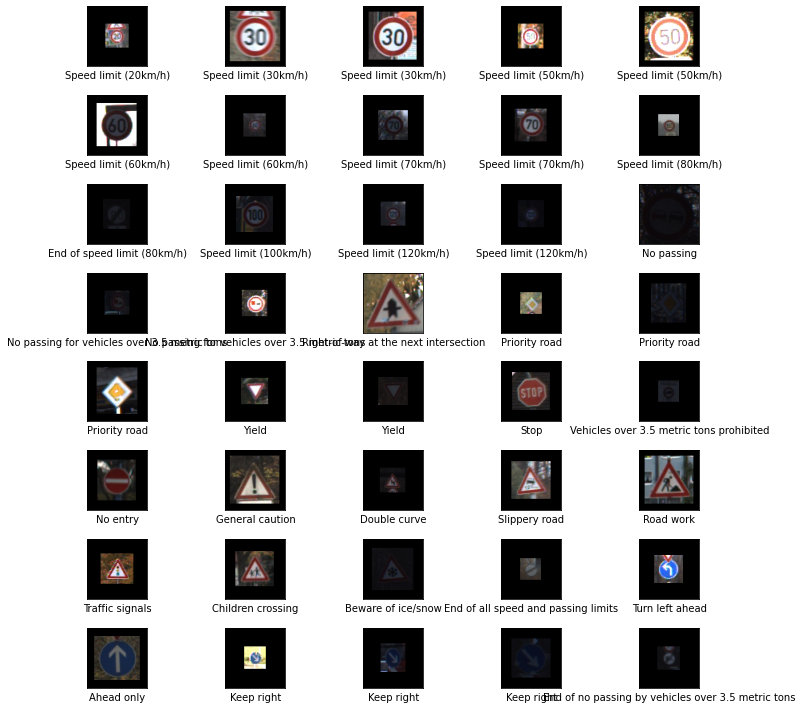

In [75]:
plot = 1
plt.figure(figsize=(10,10))
for i in range(0,39209,1000):
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainPadTensor[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[trainLabels[i]])
    plot += 1
plt.show()

In [23]:
# trainImages = np.array(trainImages)
# trainImages = tf.convert_to_tensor(trainImages, dtype=tf.float32)

#### Test Data

In [76]:
IMG_SIZE = 75 #40
testPadTensor = []
for i in range(len(testTensors)):
    try:
        testPadTensor.append(tf.image.resize_with_crop_or_pad(testTensors[i], IMG_SIZE, IMG_SIZE))
    except:
        print(i, testTensors[i].shape)

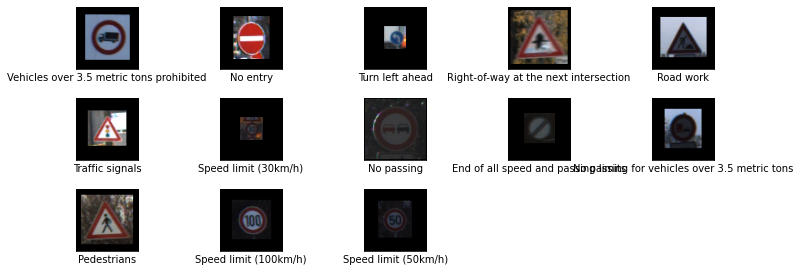

In [77]:
plot = 1
plt.figure(figsize=(10,10))
for i in range(0,12630,1000):
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testPadTensor[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[testLabels[i]])
    plot += 1
plt.show()

### Saving the images to PNG

In [78]:
import os

In [79]:
for i in range(len(trainPadTensor)):
    try:
        mypath = './trainfolders75/'+ trainLabels[i] + "/"
        filename = mypath + str(i) + '.png'
        
        if not os.path.exists(mypath):
            os.mkdir(mypath)
        
        tf.keras.preprocessing.image.save_img(filename, trainPadTensor[i], scale=True) ## already scales the images to between 0-255 so the next step is redundant
    except Exception as e:
        print(i, trainPadTensor[i].shape, e.message)
    if i == len(trainPadTensor) - 1:
        print("finished saving " + str(i) + " photos")

finished saving 39208 photos


In [80]:
# #Save the labels too!
# pdlabels = pd.DataFrame(trainLabels,columns=['Class'])

# pdlabels.head()

# pdlabels.to_csv('./train-pngs/trainlabels.csv', index=False)

#### Test Data

In [81]:
for i in tqdm(range(len(testPadTensor))):
    try:
        mypath = './testfolders75/'+ testLabels[i] + "/"
        filename = mypath + str(i) + '.png'
        
        if not os.path.exists(mypath):
            os.mkdir(mypath)
            
        tf.keras.preprocessing.image.save_img(filename, testPadTensor[i], scale=True) ## already scales the images to between 0-255 so the next step is redundant
    except Exception as e:
        print(i, testPadTensor[i].shape, e.message)
    if i == len(testPadTensor) - 1:
        print("finished saving " + str(i) + " photos")

100%|████████████████████████████████████████████████████████| 12630/12630 [00:21<00:00, 583.46it/s]

finished saving 12629 photos


In [84]:
# #Save the labels too!
# pdlabels = pd.DataFrame(testLabels,columns=['Class'])

# pdlabels.head()

# pdlabels.to_csv('./test-pngs/testlabels.csv', index=False)

### Read images from File System

In [4]:
def readTrainTestImages(trainpath,testpath):
    from tqdm import tqdm
    import matplotlib.image as mpimg
    trainImages = []
    testImages = []
    trainimgfiles = glob.glob(trainpath + '/*.png')
    testimgfiles = glob.glob(testpath + '/*.png')
    trainimgfiles = sorted(trainimgfiles, key=lambda x: int(x.split("\\")[1].split(".")[0]))
    testimgfiles = sorted(testimgfiles, key=lambda x: int(x.split("\\")[1].split(".")[0]))
    for i in tqdm(range(len(trainimgfiles))):
        # Read Images
#         print(trainimgfiles[i])
        img = mpimg.imread(trainimgfiles[i])   
        trainImages.append(img)        
    print('read ' + str(i) + " training images")   
    
    for i in tqdm(range(len(testimgfiles))):
        # Read Images
#         print(testimgfiles[i])
        img = mpimg.imread(testimgfiles[i])   
        testImages.append(img)        
    print(f'read {i} test images')
            
    
    trainImages = np.array(trainImages, dtype='float32')
    testImages = np.array(testImages, dtype='float32')
    
    trainlabels = pd.read_csv(trainpath + '/trainlabels.csv',index_col=False)
    testlabels = pd.read_csv(testpath + '/testlabels.csv',index_col=False)
    trainlabels.drop(trainlabels.columns[0], axis=1, inplace=True)
    testlabels.drop(testlabels.columns[0], axis=1, inplace=True)
    
    return trainImages, trainlabels, testImages, testlabels
#     return trainimgfiles, testimgfiles
    

In [5]:
trainpath = './train-pngs'
testpath = './test-pngs'
trainData, trainLabels, testData, testLabels = readTrainTestImages(trainpath,testpath)

  0%|                                                             | 4/12630 [00:00<06:02, 34.83it/s]

read 39208 training images


100%|████████████████████████████████████████████████████████| 12630/12630 [00:17<00:00, 719.06it/s]


read 12629 test images


### Adding Salt and Pepper Noise!

In [20]:
def add_salt_pepper_noise(X_imgs):
    # Need to produce a copy as to not modify the original image
    X_imgs_copy = X_imgs.copy()
#     print(len(X_imgs_copy))
    row, col, ch = X_imgs_copy.shape
#     print('=====> ', row, col, ch)
    salt_vs_pepper = 0.5
    amount = 0.001
    num_salt = np.ceil(amount * X_imgs_copy.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * X_imgs_copy.size * (1.0 - salt_vs_pepper))
    
    for X_img in X_imgs_copy:
        # Add Salt noise
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in X_img.shape]
#         print("coords", coords)
        X_img[coords[0], coords[1]] = 1

 

        # Add Pepper noise
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in X_img.shape]
        X_img[coords[0], coords[1]] = 0
    return X_imgs_copy
  
 

In [21]:
# plt.imshow(trainData[104])

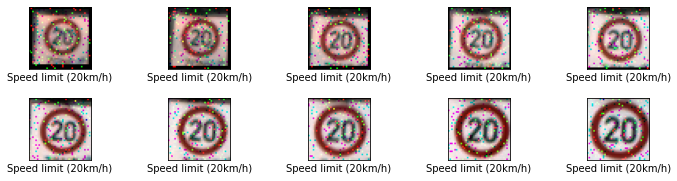

In [53]:
import matplotlib.image as mpimg
plot = 1
plt.figure(figsize=(10,10))
for i in range(100,110):
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    salt_pepper_noise_imgs = add_salt_pepper_noise(trainData[i])
    plt.imshow(salt_pepper_noise_imgs,cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[trainLabels[i]])
    plot += 1
plt.show()

#### For the full test dataset

In [23]:
import matplotlib.image as mpimg
from tqdm import tqdm
for index in tqdm(range(len(testData))):
    path = './noisydata/salt-n-pepper0.001/' + str(testLabels.iloc[index]['Class']) + "/" # + str(index) + '.png'
    filename = path + str(index) + '.png'
        
    if not os.path.exists(path):
        os.mkdir(path)
        
    salt_pepper_noise_imgs = add_salt_pepper_noise(testData[index])
#     plt.imshow(salt_pepper_noise_imgs)
#     plt.show()
    
    mpimg.imsave(filename, salt_pepper_noise_imgs,format='PNG')

100%|████████████████████████████████████████████████████████| 12630/12630 [00:46<00:00, 269.65it/s]


### Adding Periodic noise

In [24]:
import math

def get_periodic_noise( X_imgs ):
    
    X_imgs_copy = X_imgs.copy()
    row, col, ch = X_imgs_copy.shape
    degree = 0.5
    for i in range(row):
        for j in range(col):
            X_imgs_copy[i, j] = X_imgs[i,j]+ 0.25*(degree * (math.sin(degree*j))) #+ degree * math.cos(degree*j)); #only sine term, sine term into 0.5, sine plus cos term on 0.5
    X_imgs_copy=np.clip(X_imgs_copy, 0, 1)
    return X_imgs_copy

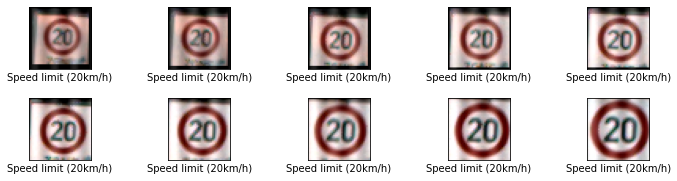

In [54]:
import matplotlib.image as mpimg
plot = 1
plt.figure(figsize=(10,10))
for i in range(100,110):
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    noiseImg = get_periodic_noise(trainData[i])
    plt.imshow(noiseImg,cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[trainLabels[i]])
    plot += 1
plt.show()

#### For the full test dataset

In [28]:
import matplotlib.image as mpimg
from tqdm import tqdm

for index in tqdm(range(len(testData))):
    path = './noisydata/periodic0.25/' +  str(testLabels.iloc[index]['Class']) + "/"
    filename = path + str(index) + '.png'
        
    if not os.path.exists(path):
        os.mkdir(path)

    noiseImg = get_periodic_noise(testData[index])
    mpimg.imsave(filename, noiseImg,format='PNG')

100%|████████████████████████████████████████████████████████| 12630/12630 [00:59<00:00, 212.87it/s]


### Greyscaling transforms for GANs

In [8]:
def get_grey_img(img):
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return imgGray

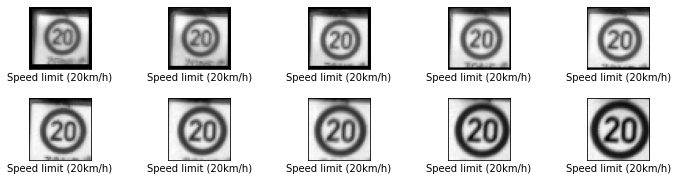

In [56]:
import matplotlib.image as mpimg
plot = 1
plt.figure(figsize=(10,10))
for i in range(100,110):
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    imgGray = get_grey_img(trainData[i])
    plt.imshow(imgGray,cmap=plt.cm.gray)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[trainLabels[i]])
    plot += 1
plt.show()


#### For the full train and test dataset

In [35]:
import matplotlib.image as mpimg
from tqdm import tqdm

for index in tqdm(range(len(trainData))):
    path = './graydata/train/' +  str(trainLabels.iloc[index]['Class']) + "/"
    filename = path + str(index) + '.png'
        
    if not os.path.exists(path):
        os.mkdir(path)

    imgGray = get_grey_img(trainData[index])
    mpimg.imsave(filename, imgGray, format='PNG',cmap='gray')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39209/39209 [00:58<00:00, 672.34it/s]


In [36]:
import matplotlib.image as mpimg
from tqdm import tqdm

for index in tqdm(range(len(testData))):
    path = './graydata/test/' +  str(testLabels.iloc[index]['Class']) + "/"
    filename = path + str(index) + '.png'
        
    if not os.path.exists(path):
        os.mkdir(path)

    imgGray = get_grey_img(testData[index])
    mpimg.imsave(filename, imgGray,format='PNG',cmap='gray')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12630/12630 [00:18<00:00, 693.05it/s]


### Adding Gaussian Noise

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models
testLayer = layers.GaussianNoise(5, input_shape=(-1,40,40,-1),dtype=tf.float32) #50
testLayer

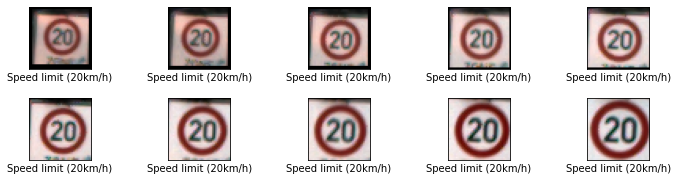

In [61]:
import matplotlib.image as mpimg
plot = 1
plt.figure(figsize=(10,10))
for i in range(100,110):
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    noise_img = testLayer(trainData[i]) #add_salt_pepper_noise(trainData[index])
    plt.imshow(noise_img,cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[trainLabels[i]])
    plot += 1
plt.show()

##### for the full test dataset

In [62]:
import matplotlib.image as mpimg
from tqdm import tqdm

for index in tqdm(range(len(testData))):
    path = './noisydata/gaussian5/' +  str(testLabels.iloc[index]['Class']) + "/"
    filename = path + str(index) + '.png'
        
    if not os.path.exists(path):
        os.mkdir(path)

    noise_img = testLayer(trainData[index])
    tf.keras.preprocessing.image.save_img(filename, noise_img)

100%|████████████████████████████████████████████████████████| 12630/12630 [00:15<00:00, 804.78it/s]


# END

In [18]:
# def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
#     # initialize the dimensions of the image to be resized and
#     # grab the image size
#     dim = None
#     (h, w) = image.shape[:2]

#     # if both the width and height are None, then return the
#     # original image
#     if width is None and height is None:
#         return image

#     # check to see if the width is None
#     if width is None:
#         # calculate the ratio of the height and construct the
#         # dimensions
#         r = height / float(h)
#         dim = (int(w * r), height)

#     # otherwise, the height is None
#     else:
#         # calculate the ratio of the width and construct the
#         # dimensions
#         r = width / float(w)
#         dim = (width, int(h * r))

#     # resize the image
#     resized = cv2.resize(image, dim, interpolation = inter)

#     # return the resized image
#     return resized